In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import minimize
import yfinance as yf
import seaborn as sns
%load_ext autoreload
%autoreload 2
import module as rk

In [2]:
tickers = ['TATAMOTORS.NS','DABUR.NS','BAJAJ-AUTO.NS','BERGEPAINT.NS','HAVELLS.NS','HDFCBANK.NS','TORNTPHARM.NS','HINDUNILVR.NS','RELIANCE.NS','TITAN.NS']
data = yf.download(tickers, start='2008-6-2', end='2024-6-2') #fetching monthly data for 16 years
price_data=data['Close'] #taking the closing price to determine returns
returns = price_data[tickers].pct_change().dropna()
returns.dropna(inplace=True)
rets = pd.DataFrame(returns)

[*********************100%%**********************]  10 of 10 completed


In [3]:
rets.head()

Ticker,TATAMOTORS.NS,DABUR.NS,BAJAJ-AUTO.NS,BERGEPAINT.NS,HAVELLS.NS,HDFCBANK.NS,TORNTPHARM.NS,HINDUNILVR.NS,RELIANCE.NS,TITAN.NS
Date,,,,,,,,,,
2008-06-03,0.010630,-0.015018,-0.001894,-0.021592,-0.005173,-0.033651,-0.014511,0.001490,0.020286,0.009549
2008-06-04,-0.051538,0.011041,-0.047611,0.001379,-0.041384,-0.040587,-0.028469,-0.021249,-0.041406,0.012990
2008-06-05,-0.014878,0.001560,0.018656,-0.015152,0.003985,0.027284,0.009431,0.032783,-0.026094,-0.011403
2008-06-06,0.013508,-0.002596,0.011380,0.034965,-0.020728,-0.012579,-0.010344,-0.002523,-0.003694,-0.004570
2008-06-09,-0.037856,0.007808,-0.035162,-0.025676,-0.011484,-0.039637,-0.058328,-0.023182,-0.033862,-0.011282


<Axes: xlabel='Date'>

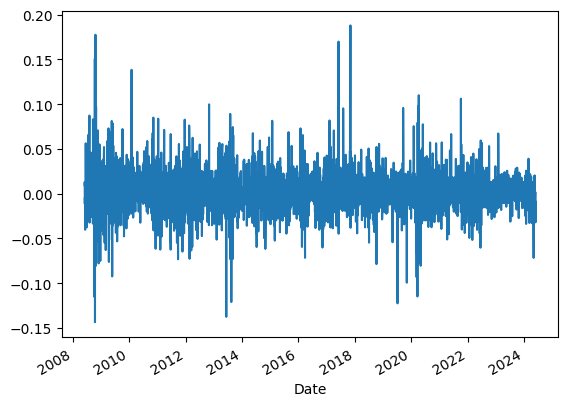

In [4]:
returns['TITAN.NS'].plot()

In [5]:
n_days = returns.shape[0]
return_per_day = (returns+1).prod()**(1/n_days) - 1
return_per_day

Ticker
TATAMOTORS.NS    0.000544
DABUR.NS         0.000615
BAJAJ-AUTO.NS    0.000874
BERGEPAINT.NS    0.000947
HAVELLS.NS       0.000938
HDFCBANK.NS      0.000624
TORNTPHARM.NS    0.001077
HINDUNILVR.NS    0.000582
RELIANCE.NS      0.000424
TITAN.NS         0.001027
dtype: float64

In [6]:
annualized_return = (returns+1).prod()**(252/n_days) - 1
annualized_return

Ticker
TATAMOTORS.NS    0.146933
DABUR.NS         0.167660
BAJAJ-AUTO.NS    0.246279
BERGEPAINT.NS    0.269427
HAVELLS.NS       0.266562
HDFCBANK.NS      0.170231
TORNTPHARM.NS    0.311606
HINDUNILVR.NS    0.157978
RELIANCE.NS      0.112610
TITAN.NS         0.295114
dtype: float64

In [7]:
print("Tickers", '\t ',"Max Drawdown", '\t\t',"Max Drawdown Date")
print("************************************************************")
for i in tickers :
  print(i, '\t', rk.drawdown(rets[i])['Drawdown'].min(), '\t', rk.drawdown(rets[i])['Drawdown'].idxmin())

Tickers 	  Max Drawdown 		 Max Drawdown Date
************************************************************
TATAMOTORS.NS 	 -0.8908272068690141 	 2020-04-03 00:00:00
DABUR.NS 	 -0.3298139409640584 	 2008-10-27 00:00:00
BAJAJ-AUTO.NS 	 -0.5226122987958391 	 2008-12-02 00:00:00
BERGEPAINT.NS 	 -0.376264527453478 	 2023-01-27 00:00:00
HAVELLS.NS 	 -0.7748302228950653 	 2009-02-27 00:00:00
HDFCBANK.NS 	 -0.41054975597653853 	 2020-03-24 00:00:00
TORNTPHARM.NS 	 -0.424908424908425 	 2008-12-02 00:00:00
HINDUNILVR.NS 	 -0.3088054952366771 	 2022-03-07 00:00:00
RELIANCE.NS 	 -0.5763821094508356 	 2008-10-24 00:00:00
TITAN.NS 	 -0.4533214186083716 	 2009-03-12 00:00:00


In [8]:
rk.skewness(rets).sort_values()

Ticker
BAJAJ-AUTO.NS    0.116752
HDFCBANK.NS      0.266162
RELIANCE.NS      0.342727
TATAMOTORS.NS    0.362239
TITAN.NS         0.419703
DABUR.NS         0.565488
TORNTPHARM.NS    0.752178
BERGEPAINT.NS    0.850631
HINDUNILVR.NS    0.915407
HAVELLS.NS       1.234133
dtype: float64

In [9]:
rk.kurtosis(rets).sort_values()

Ticker
TATAMOTORS.NS     8.683721
BAJAJ-AUTO.NS     9.821511
BERGEPAINT.NS    10.042314
TITAN.NS         10.647165
HDFCBANK.NS      11.299972
TORNTPHARM.NS    11.360524
HINDUNILVR.NS    11.681800
DABUR.NS         12.080128
RELIANCE.NS      12.702986
HAVELLS.NS       23.689073
dtype: float64

In [10]:
rk.semideviation(rets).sort_values()

Ticker
HINDUNILVR.NS    0.009651
DABUR.NS         0.010493
HDFCBANK.NS      0.011978
TORNTPHARM.NS    0.012306
BAJAJ-AUTO.NS    0.012818
BERGEPAINT.NS    0.013165
RELIANCE.NS      0.013674
TITAN.NS         0.015074
HAVELLS.NS       0.015209
TATAMOTORS.NS    0.018905
dtype: float64

In [11]:
rk.sharpe_ratio(rets).sort_values()

Ticker
RELIANCE.NS      0.253164
TATAMOTORS.NS    0.253186
HINDUNILVR.NS    0.500863
HDFCBANK.NS      0.504891
DABUR.NS         0.519879
HAVELLS.NS       0.623394
BERGEPAINT.NS    0.694065
BAJAJ-AUTO.NS    0.710640
TITAN.NS         0.737817
TORNTPHARM.NS    0.881636
dtype: float64

In [12]:
rk.var_historic(rets, level=5)

Ticker
TATAMOTORS.NS    0.040164
DABUR.NS         0.024168
BAJAJ-AUTO.NS    0.025639
BERGEPAINT.NS    0.030224
HAVELLS.NS       0.031121
HDFCBANK.NS      0.023735
TORNTPHARM.NS    0.025930
HINDUNILVR.NS    0.022838
RELIANCE.NS      0.027957
TITAN.NS         0.030967
dtype: float64

In [13]:
rk.var_gaussian(rets)

Ticker
TATAMOTORS.NS    0.045514
DABUR.NS         0.025891
BAJAJ-AUTO.NS    0.029568
BERGEPAINT.NS    0.033534
HAVELLS.NS       0.036969
HDFCBANK.NS      0.027172
TORNTPHARM.NS    0.030866
HINDUNILVR.NS    0.025000
RELIANCE.NS      0.032201
TITAN.NS         0.034879
dtype: float64

<Axes: title={'center': 'Hedge Fund Indices: VaR at 5%'}, xlabel='Ticker'>

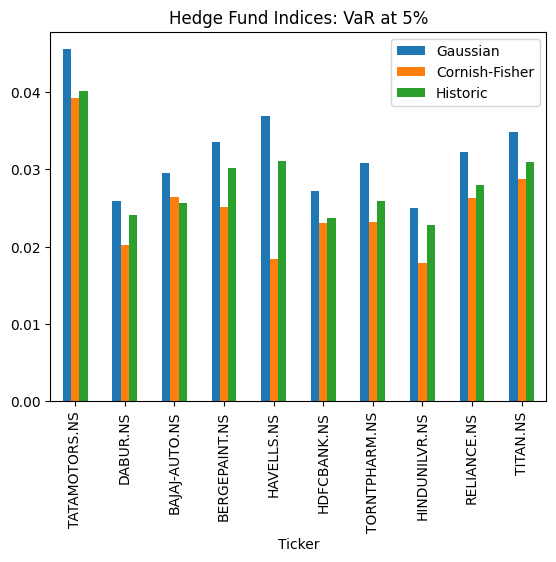

In [14]:
var_table = [rk.var_gaussian(rets),
             rk.var_gaussian(rets, modified=True),
             rk.var_historic(rets)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

In [15]:
rk.sharpe_ratio(rets, 0.03).sort_values()

Ticker
RELIANCE.NS      0.253164
TATAMOTORS.NS    0.253186
HINDUNILVR.NS    0.500863
HDFCBANK.NS      0.504891
DABUR.NS         0.519879
HAVELLS.NS       0.623394
BERGEPAINT.NS    0.694065
BAJAJ-AUTO.NS    0.710640
TITAN.NS         0.737817
TORNTPHARM.NS    0.881636
dtype: float64

<Axes: title={'center': 'Industry Sharpe Ratios'}, xlabel='Ticker'>

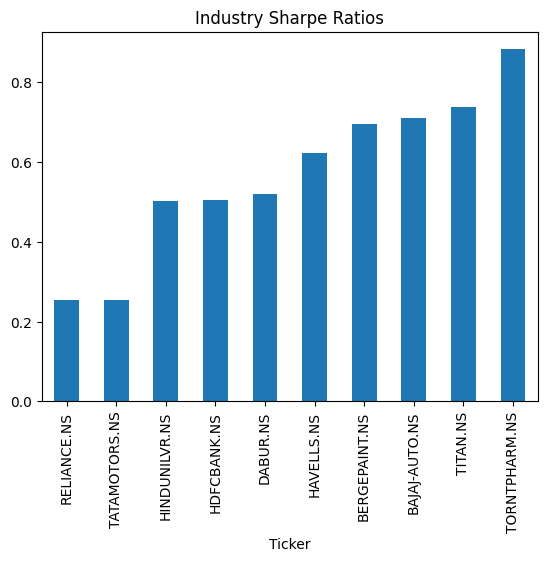

In [16]:
rk.sharpe_ratio(rets, 0.03).sort_values().plot.bar(title='Industry Sharpe Ratios')

In [17]:
expected_returns=rk.annualized_return(rets)
expected_returns

Ticker
TATAMOTORS.NS    0.146933
DABUR.NS         0.167660
BAJAJ-AUTO.NS    0.246279
BERGEPAINT.NS    0.269427
HAVELLS.NS       0.266562
HDFCBANK.NS      0.170231
TORNTPHARM.NS    0.311606
HINDUNILVR.NS    0.157978
RELIANCE.NS      0.112610
TITAN.NS         0.295114
dtype: float64

<Axes: xlabel='Ticker'>

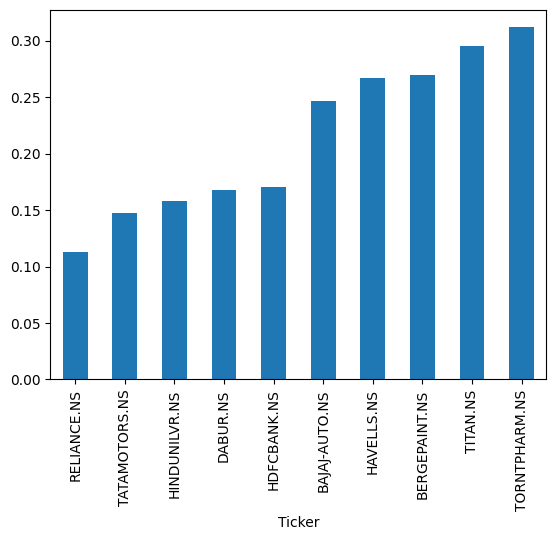

In [18]:
expected_returns.sort_values().plot.bar()

In [19]:
cov_matrix = rets.cov() #to get covariance between the assets
cov_matrix.head()

Ticker,TATAMOTORS.NS,DABUR.NS,BAJAJ-AUTO.NS,BERGEPAINT.NS,HAVELLS.NS,HDFCBANK.NS,TORNTPHARM.NS,HINDUNILVR.NS,RELIANCE.NS,TITAN.NS
Ticker,,,,,,,,,,
TATAMOTORS.NS,0.000798,0.000109,0.000176,0.000133,0.000234,0.000182,0.000118,0.000083,0.000236,0.000203
DABUR.NS,0.000109,0.000262,0.000065,0.000078,0.000097,0.000065,0.000058,0.000088,0.000076,0.000081
BAJAJ-AUTO.NS,0.000176,0.000065,0.000347,0.000077,0.000118,0.000113,0.000073,0.000067,0.000126,0.000121
BERGEPAINT.NS,0.000133,0.000078,0.000077,0.000445,0.000123,0.000072,0.000071,0.000068,0.000094,0.000102
HAVELLS.NS,0.000234,0.000097,0.000118,0.000123,0.000539,0.000121,0.000080,0.000071,0.000144,0.000138


In [20]:
ew=np.repeat(0.10, 10)
r=rk.portfolio_return(ew, expected_returns)

In [21]:
vol=rk.portfolio_vol(ew, cov_matrix) #Naive- weights

**Maximum Sharpe Ratio Strategy**

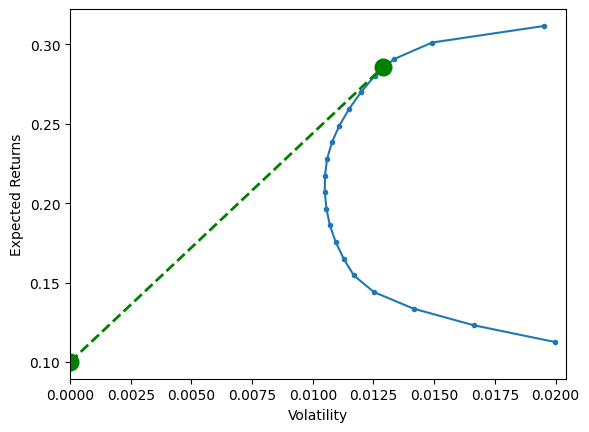

In [22]:
# plot EF
er=expected_returns
cov=cov_matrix
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
ax.set_ylabel('Expected Returns')
ax.set_xlabel('Volatility')
# get MSR
rf = 0.1
w_msr = rk.msr(rf, er, cov)
r_msr = rk.portfolio_return(w_msr, er)
vol_msr =rk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [23]:
rk.msr(0.1, np.array(er), cov) #weights allocated t each asset

array([0.00000000e+00, 5.00791518e-14, 1.60412193e-01, 1.84693294e-01,
       9.72097462e-02, 2.36432793e-14, 3.68686669e-01, 5.91146886e-14,
       0.00000000e+00, 1.88998098e-01])

**Global Minimum Volatility strategy**

<Axes: xlabel='Volatility'>

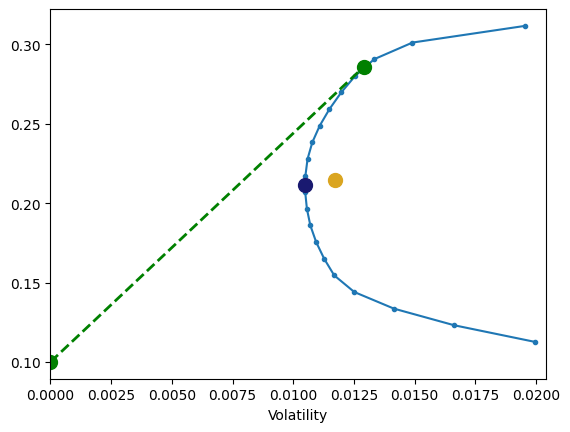

In [24]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

**Comparing the strategies**

In [25]:
ann_rets = pd.Series(rk.annualized_return(rets))

In [26]:
#calculating weights to optimize for the maximum sharpe ratio using msr function from the risk module
weights_gmv=rk.gmv(cov_matrix)
#return of the optimized portfolio
r_gmv=rk.portfolio_return(weights_gmv,ann_rets)
#volatility of the optimized portfolio
vol_gmv=rk.portfolio_vol(weights_gmv,cov_matrix)

In [27]:
#calculating weights to optimize for the maximum sharpe ratio using msr function from the risk module
weights=rk.msr(0.03,ann_rets, cov_matrix)
#return of the optimized portfolio
r=rk.portfolio_return(weights,ann_rets)
#volatility of the optimized portfolio
vol=rk.portfolio_vol(weights,cov_matrix)

In [28]:
sharpe = (r-0.03)/vol
print(f"The return of the portfolio is {r*100}%")
print(f"The volatility of the portfolio is {vol*100}%")
print(f"The Sharpe Ratio of the portfolio is {sharpe}")

The return of the portfolio is 26.84385343575771%
The volatility of the portfolio is 1.1906581102020546%
The Sharpe Ratio of the portfolio is 20.025776695638857


In [29]:
sharpe_gmv = (r_gmv-0.03)/vol_gmv
print(f"The return of the gmv portfolio is {r_gmv*100}%")
print(f"The volatility of the gmv portfolio is {vol_gmv*100}%")
print(f"The Sharpe Ratio of the gmv portfolio is {sharpe_gmv}")

The return of the gmv portfolio is 21.115940531409635%
The volatility of the gmv portfolio is 1.0476063695079163%
The Sharpe Ratio of the gmv portfolio is 17.29269796242179


**Assets Allocation according to MAximum Sharpe ratio strategy**

In [30]:
data=np.array(rk.gmv(cov))

[]

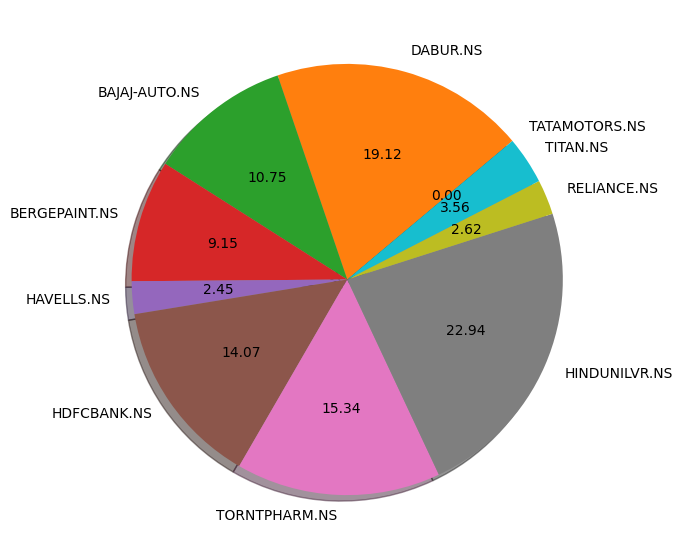

In [31]:
def func(pct, data):
    absolute = (pct / 100.*np.sum(data))
    return "{:.2f}".format(pct)
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  labels=tickers,
                                  shadow=True,
                                  startangle=40)

ax.plot()

**Assets Allocation according to Global Minimum Volatility strategy**

In [32]:
data=np.array(weights)

[]

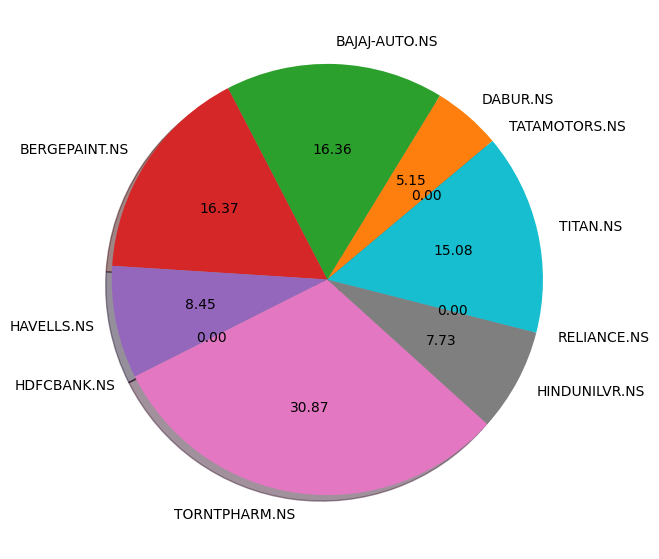

In [33]:
def func(pct, data):
    absolute = (pct / 100.*np.sum(data))
    return "{:.2f}".format(pct)
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  labels=tickers,
                                  shadow=True,
                                  startangle=40)

ax.plot()

**Implementing CPPI Strategy**

In [34]:
#Taking the same 10 assets as risky assets and using them as risky assets in CPPI
df = rk.run_cppi( rets,safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=None)

<Axes: title={'center': 'TITAN.NS'}, xlabel='Date'>

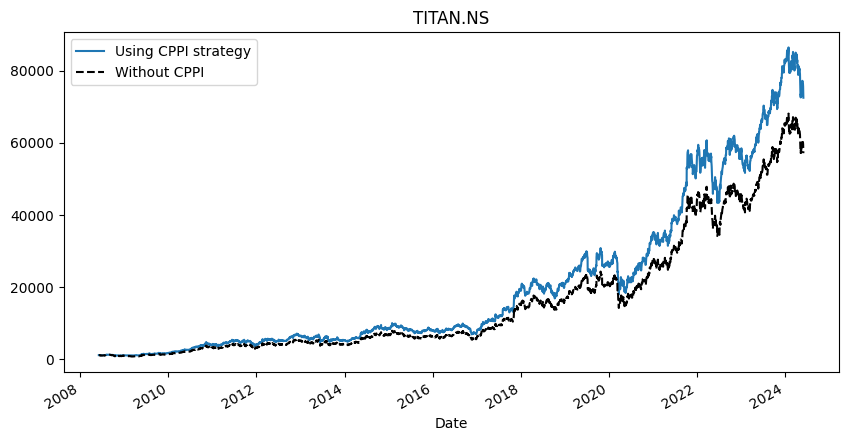

In [35]:
#Comparing returns of Titan
ax = df["Wealth"]['TITAN.NS'].plot(title="TITAN.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['TITAN.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

<Axes: title={'center': 'HDFCBANK.NS'}, xlabel='Date'>

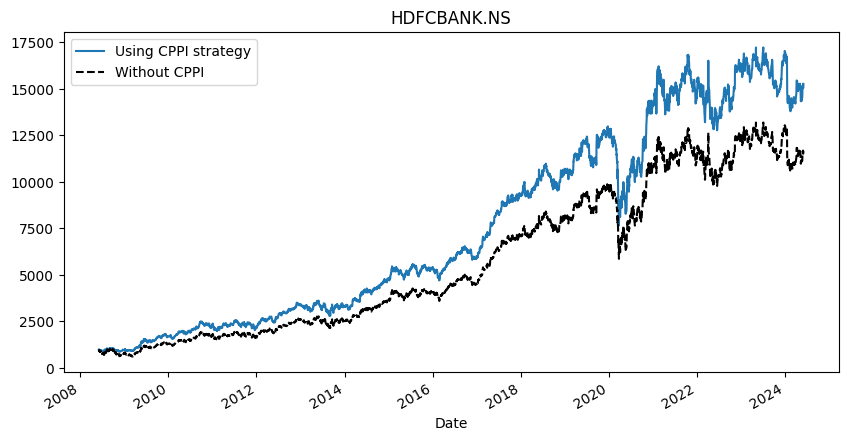

In [36]:
ax = df["Wealth"]['HDFCBANK.NS'].plot(title="HDFCBANK.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['HDFCBANK.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

<Axes: title={'center': 'TATAMOTORS.NS'}, xlabel='Date'>

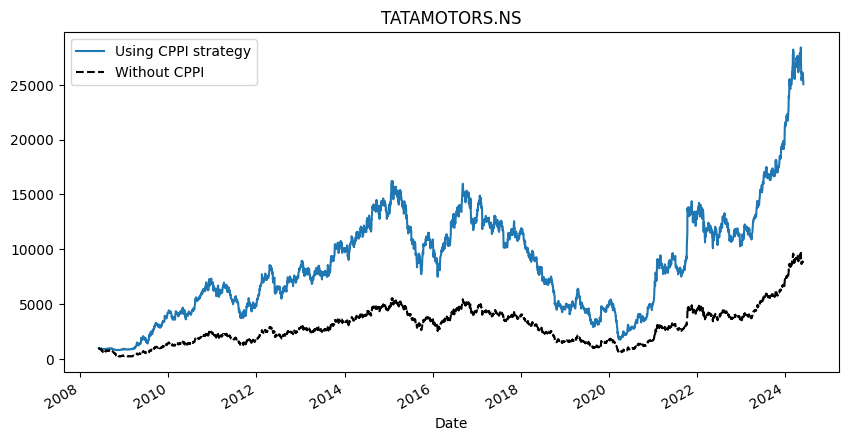

In [37]:
ax = df["Wealth"]['TATAMOTORS.NS'].plot(title="TATAMOTORS.NS",label="Using CPPI strategy",legend=True, figsize=(10, 5))
df["Risky Wealth"]['TATAMOTORS.NS'].plot(label="Without CPPI",ax = ax, style="k--", legend=True)

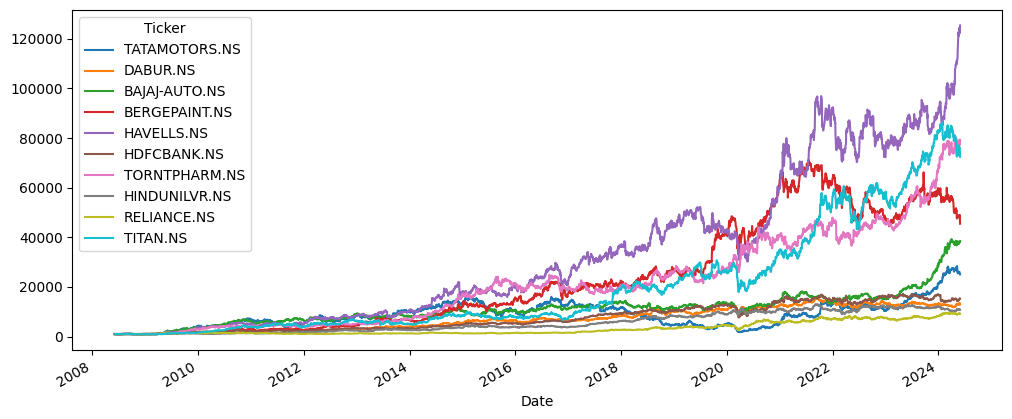

In [38]:
# plotting the wealth index after running cppi
ax = df["Wealth"].plot(figsize=(12,5))

<Axes: xlabel='Date'>

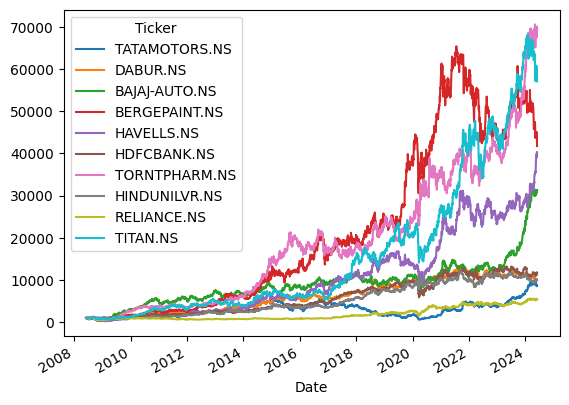

In [39]:
#plotting returns if all the initial amount was placed in the risky asset
df["Risky Wealth"].plot()

In [40]:
#calculating the return series for the portfolio where cppi was used
cppi_rets = df["Wealth"].pct_change().dropna()

In [41]:
#performance of the portfolio
rk.summary_stats(cppi_rets)

,Ticker,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Sharpe Ratio
0,TATAMOTORS.NS,0.228163,0.417893,0.513107,9.091768,0.034930,0.474197
1,DABUR.NS,0.178459,0.242688,0.216116,6.159208,0.022448,0.611729
2,BAJAJ-AUTO.NS,0.262970,0.272028,0.182491,8.074078,0.024455,0.856419
3,BERGEPAINT.NS,0.277510,0.327274,0.841033,9.496865,0.024819,0.756278
4,HAVELLS.NS,0.362289,0.339621,1.274772,18.563649,0.018610,0.978410
5,HDFCBANK.NS,0.191904,0.242208,0.330357,11.425388,0.020223,0.668451
6,TORNTPHARM.NS,0.322926,0.290669,0.387569,8.043924,0.024904,1.007763
7,HINDUNILVR.NS,0.163932,0.238218,1.006766,12.636407,0.016469,0.562224
8,RELIANCE.NS,0.150807,0.279583,0.631190,13.564023,0.021208,0.432096
9,TITAN.NS,0.314577,0.326116,0.376379,10.025502,0.027326,0.872625
